### Import Libraries

In [5]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os 

In [6]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("vipoooool/new-plant-diseases-dataset")

DATA_DIR = "./data"
TRAIN_DIR = os.path.join(DATA_DIR, "train")
VAL_DIR   = os.path.join(DATA_DIR, "valid")

In [7]:
DATA_DIR = "/kaggle/input/new-plant-diseases-dataset"
TRAIN_DIR = os.path.join(DATA_DIR, "New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train")
VAL_DIR   = os.path.join(DATA_DIR, "New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid")

### Data Preprocessing

trainning image Preprocessing


In [9]:
training_set = tf.keras.utils.image_dataset_from_directory(
    TRAIN_DIR,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.


Validation images

In [10]:
 validation_set = tf.keras.utils.image_dataset_from_directory(
    VAL_DIR,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


### Building a model

In [24]:
cnn = tf.keras.models.Sequential()

### Building layers

In [25]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [26]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [27]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [28]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [29]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [30]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [31]:
cnn.add(tf.keras.layers.Flatten())

In [32]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [33]:
cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting

In [34]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=38,activation='softmax'))

### Compiling my model

In [35]:

cnn.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [20]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │    13,825,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │        57,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,054,794 (57.43 MB)

 Trainable params: 15,054,794 (57.43 MB)

 Non-trainable params: 0 (0.00 B)

### Model training

In [36]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 86s 35ms/step - accuracy: 0.3814 - loss: 2.2011 - val_accuracy: 0.8290 - val_loss: 0.5488
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 71s 32ms/step - accuracy: 0.8187 - loss: 0.5734 - val_accuracy: 0.9085 - val_loss: 0.2875
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 71s 32ms/step - accuracy: 0.8964 - loss: 0.3187 - val_accuracy: 0.9360 - val_loss: 0.1975
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 71s 32ms/step - accuracy: 0.9287 - loss: 0.2180 - val_accuracy: 0.9344 - val_loss: 0.2026
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 71s 32ms/step - accuracy: 0.9486 - loss: 0.1546 - val_accuracy: 0.9441 - val_loss: 0.1704
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 72s 33ms/step - accuracy: 0.9626 - loss: 0.1126 - val_accuracy: 0.9508 - val_loss: 0.1574
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 71s 32ms/step - accuracy: 0.9676 - loss: 0.0958 - val_accuracy: 0.9652 - val_loss: 0.1178
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 72s 33ms/step - accuracy: 0.9745 -

### Model Evaluation

In [38]:
# model evaluation on Training set

train_loss, train_accuracy = cnn.evaluate(training_set)
print('Training accuracy:', train_accuracy)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 30s 14ms/step - accuracy: 0.9866 - loss: 0.0420
Training accuracy: 0.9883490800857544


In [39]:
#Validation set Accuracy
val_loss, val_accuracy = cnn.evaluate(validation_set)
print('Validation accuracy:', val_accuracy)

550/550 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.9636 - loss: 0.1230
Validation accuracy: 0.9606191515922546


### Saving Model

In [40]:
cnn.save('trained_plant_disease_model.keras')

In [41]:
training_history.history

{'accuracy': [0.5803968906402588,
  0.8458069562911987,
  0.9076178669929504,
  0.9353723526000977,
  0.9516893029212952,
  0.9645067453384399,
  0.9696279764175415,
  0.9752329587936401,
  0.9782203435897827,
  0.9819901585578918],
 'loss': [1.4246116876602173,
  0.48463401198387146,
  0.2858651578426361,
  0.19782467186450958,
  0.14441488683223724,
  0.10718003660440445,
  0.09108392149209976,
  0.07753162086009979,
  0.06529635190963745,
  0.05531308799982071],
 'val_accuracy': [0.8289893269538879,
  0.908490777015686,
  0.936034619808197,
  0.9344411492347717,
  0.9440587162971497,
  0.9507739543914795,
  0.9651718735694885,
  0.9610175490379333,
  0.9506601691246033,
  0.9606191515922546],
 'val_loss': [0.5488155484199524,
  0.28750452399253845,
  0.19750820100307465,
  0.20259356498718262,
  0.1704198718070984,
  0.15743258595466614,
  0.11780724674463272,
  0.12386107444763184,
  0.17151829600334167,
  0.13569486141204834]}

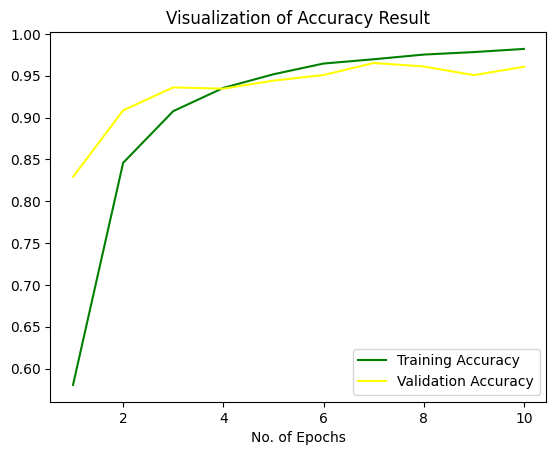

In [44]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='green',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='yellow',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

### Model evaluation other ways

In [46]:
TEST_DIR   = os.path.join(DATA_DIR, "test")

In [58]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt

### Loading a model

In [60]:
model_pred = tf.keras.models.load_model('trained_plant_disease_model.keras')

In [62]:
import os

print(os.listdir("/kaggle/working"))


['trained_plant_disease_model.keras', '.virtual_documents']
